# Lab 5.02 - Two-sample t-test

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 2 - exercise facilities

Many companies have installed exercise facilities at their plants. The goal is not only to provide a bonus (free use of exercise equipment) for their employees, but to make the employees more productive by getting them in better shape. One such (fictional) company, Informatrix Software Company, installed exercise equipment on site a year ago.   
To check whether it has had a beneficial effect on employee productivity, the company gathered data on a sample of 80 randomly chosen employees, all between the ages of 30 and 40 and all with similar job titles and duties. The company observed which of these employees use the exercise facility regularly (at least three times per week on average). This group included 23 of the 80 employees in the sample. The other 57 employees were asked whether they exercise regularly elsewhere, and 6 of them replied that they do. The remaining 51, who admitted 
to being nonexercisers, were then compared to the combined group of 29 exercisers.  
The comparison was based on the employees' productivity over the year, as rated by their supervisors. Each rating was on a scale of 1 to 25, 25 being the best. To increase the validity of the study, neither the employees nor the supervisors were told that a study was in progress. In particular, the supervisors did not know which employees were involved 
in the study or which were exercisers.

1. Make Box Plot of Ratings by Exerciser
2. Use a test to see whether 
regular exercise increases worker productivity.
3. Calculate Cohen's d to know the effect size

A few results

2. pvalue=0.006299793 < 0.05 => the productivity of Exercisers is significantly higher than of no Exercisers
3. Cohen's d is 0.55509: average effect size

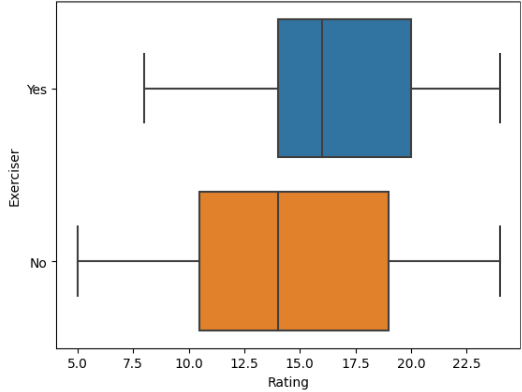


In [2]:
exercise_facilities = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Exercise%20%26%20Productivity.csv', delimiter=';')
exercise_facilities.head()

,Employee,Exerciser,Rating
0,1,Yes,14
1,2,No,7
2,3,No,15
3,4,Yes,15
4,5,No,13


### Stap 1: Plot maken (Boxplot
- We maken eerst een boxplot om visueel te bekijken of er een verschil in productiviteit is tussen de groepen.

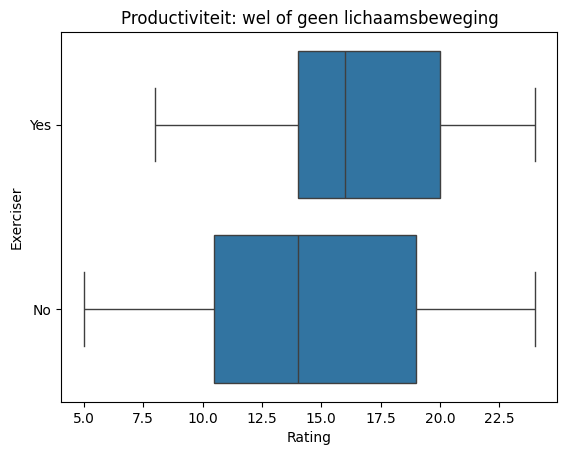

In [3]:
sns.boxplot(data=exercise_facilities, x='Rating', y='Exerciser')
plt.title('Productiviteit: wel of geen lichaamsbeweging')
plt.show()

### Stap 2: t-test voor twee onafhankelijke groepen uitvoeren

In [4]:
# Ratings per groep
ratings_exercise = exercise_facilities[exercise_facilities['Exerciser'] == 'Yes']['Rating']
ratings_noexercise = exercise_facilities[exercise_facilities['Exerciser'] == 'No']['Rating']

# Onafhankelijke t-test
t_stat, p_value = stats.ttest_ind(ratings_exercise, ratings_noexercise, equal_var=False)
print("p-value:", p_value)

p-value: 0.012599586168839763


- Waarom ttest_ind()?
    - Omdat we twee aparte, onafhankelijke groepen vergelijken.
    - De ene groep zijn mensen die regelmatig bewegen, de andere zijn mensen die dat niet doen.

- Waarom equal_var=False?
    - Omdat we niet zomaar mogen aannemen dat de spreiding in beide groepen gelijk is.
    → Dit maakt de test veiliger en betrouwbaarder (Welch’s t-test).

In [6]:
# Stap 4: Interpretatie van p-value
if p_value < 0.05:
    print("→ Regelmatige lichaamsbeweging leidt tot significant hogere productiviteit.")
else:
    print("→ Geen significant verschil in productiviteit tussen de groepen.")


→ Regelmatige lichaamsbeweging leidt tot significant hogere productiviteit.


### Stap 4: Bereken Cohen's d (effectgrootte)

- Waarom Cohen's d?
- De p-waarde zegt alleen of het verschil bestaat, maar Cohen’s d zegt hoe groot het verschil is.

    - 0.2 = klein effect

    - 0.5 = gemiddeld effect

    - 0.8 = groot effect

In [7]:
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

cohen_d = cohens_d(ratings_exercise, ratings_noexercise)
print("Cohen's d:", cohen_d)

Cohen's d: 0.5550913421564817
